<a href="https://colab.research.google.com/github/rndbblnn/stonks-jupyter/blob/main/charting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
!pip install yfinance
!pip install mplfinance

import yfinance as yf
import mplfinance as mpf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import json
import requests
import urllib.parse
import base64
import warnings
import logging

warnings.filterwarnings('ignore')

baseurl = 'https://5d3346f796b8.ngrok.io';

def encodeUrl(arg):
  str = arg.replace('.','%2E')
  return urllib.parse.quote(str)

#  create function to plot market and indexes
def plotPerformance(arg):
    df = arg
    df.info()
    
    #  plot #4
    plt.figure(figsize=(10,6))
    plt.plot(df[ticker])
    plt.title('SYMBOLS', fontsize = 14)
    plt.ylabel('percent change', fontsize = 14)
    plt.legend(df[ticker], loc="upper left", bbox_to_anchor=(1,1))
    plt.xticks(rotation = 90)
    plt.show()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [86]:
#tsla=yf.Ticker("ENPH").history('5y')
#mpf.plot(tsla['2021-01-01':'2022-09-10'])

#tsla.to_csv('tsla.csv')
# df=pd.read_csv('patterns.csv')
q = '\
[d]H.0 * 0.99 > [d]MAXH20.1 \n\
AND [d]C.0 < [d]O.0 \n\
AND [d]C.0 < [d]C.1 \n\
AND [d]C.1 > [d]AVGC20.0 \n\
AND [d]AVGC10.0 > [d]AVGC20.0 \n\
AND [d]AVGC20.0 > [d]AVGC50.0 \n\
AND [d]AVGC50.0 > [d]AVGC100.0 \n\
AND [d]AVGC100.0 > [d]AVGC200.0 \n\
AND [d]AVGC100.0 > [d]AVGC200.0 \n\
AND (\n\
    [d]DV.0 > 1.0 \n\
    OR [d]MINDV3.1 > 2.0\n\
    OR [d]AVGDV20.0 > 3.0\n\
)\n\
AND (\n\
    [d]ATR1.0 > 8.0 \n\
    OR [d]ATR20.0 > 5.0 \n\
    OR [d]ATR20.20 > 5.0 \n\
    OR [d]ATR20.40 > 5.0 \n\
)\
';

try:
  r = requests.post(baseurl + '/search', data={'q': q})
  df = pd.DataFrame(r.json()['payload'])
except Exception as e:
  # try:
  #   r = requests.post(baseurl + '/search', data={'q': q})
  #   df = pd.DataFrame(r.json()['payload'])
  # except Exception as e:
  logging.error(f"Exception Name: {type(e).__name__}")
  logging.error(f"Exception Desc: {e}")
  print(r)
  print(r.text)
  raise e

print(df.head)
df['patternTime'] = pd.to_datetime(df['patternTime'])
df['patternTimeFrom'] = df['patternTime'] + pd.DateOffset(days=-60)
df['patternTimeTo'] = df['patternTime'] + pd.DateOffset(days=150)

<bound method NDFrame.head of    symbol          patternTime
0      AR  2022-08-19T00:00:00
1    GSUN  2022-08-19T00:00:00
2     SJT  2022-08-19T00:00:00
3    INSW  2022-08-18T00:00:00
4     UNG  2022-08-18T00:00:00
5    GSAT  2022-08-16T00:00:00
6    APLS  2022-08-11T00:00:00
7    CLFD  2022-08-11T00:00:00
8    COGT  2022-08-11T00:00:00
9    GTLS  2022-08-11T00:00:00
10   PRCT  2022-08-11T00:00:00
11   TCDA  2022-08-11T00:00:00
12   XENE  2022-08-11T00:00:00
13   INSW  2022-08-10T00:00:00
14   KRTX  2022-08-09T00:00:00
15   APLS  2022-08-08T00:00:00
16   CLFD  2022-08-08T00:00:00
17   CPRX  2022-08-08T00:00:00
18   GSAT  2022-08-08T00:00:00
19   IMCR  2022-08-08T00:00:00
20   PRCT  2022-08-08T00:00:00
21   PRVA  2022-08-08T00:00:00
22   SIGA  2022-08-08T00:00:00
23   SVIX  2022-08-08T00:00:00
24   SWAV  2022-08-08T00:00:00
25   DGII  2022-08-05T00:00:00
26   LNTH  2022-08-04T00:00:00
27    NFE  2022-08-04T00:00:00
28    TNK  2022-08-04T00:00:00
29   SWAV  2022-08-03T00:00:00
30   ENPH

2022-06-20 -> 2023-01-16


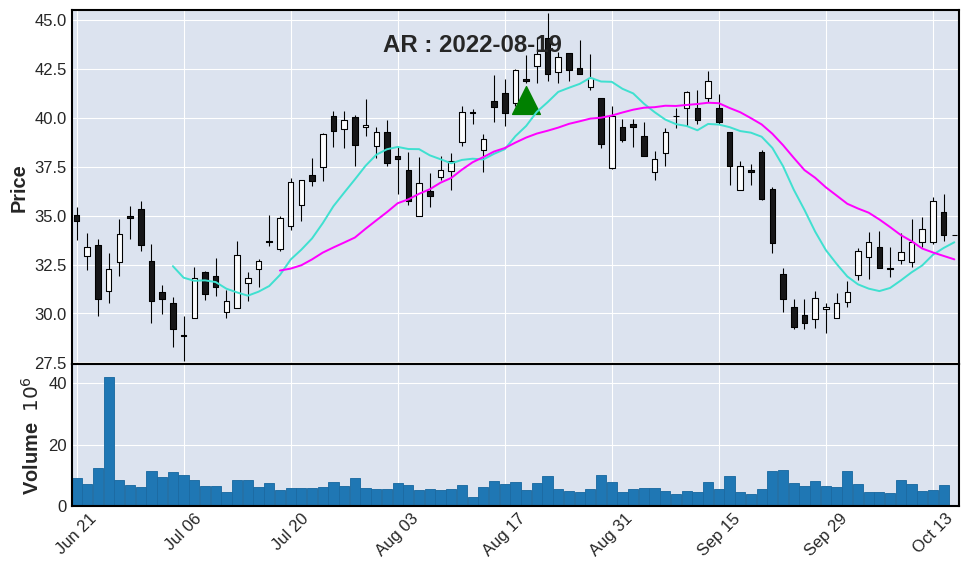

2022-06-20 -> 2023-01-16


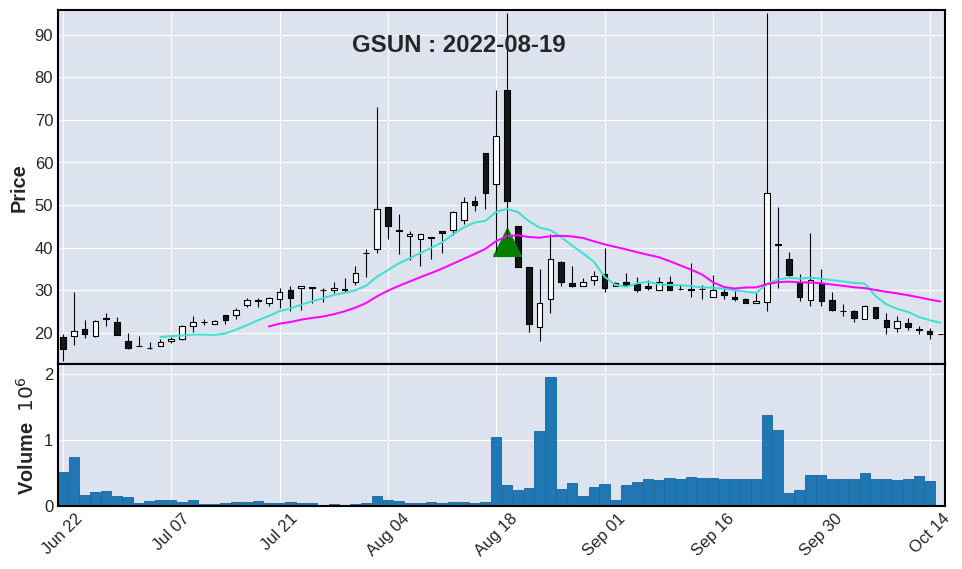

2022-06-20 -> 2023-01-16


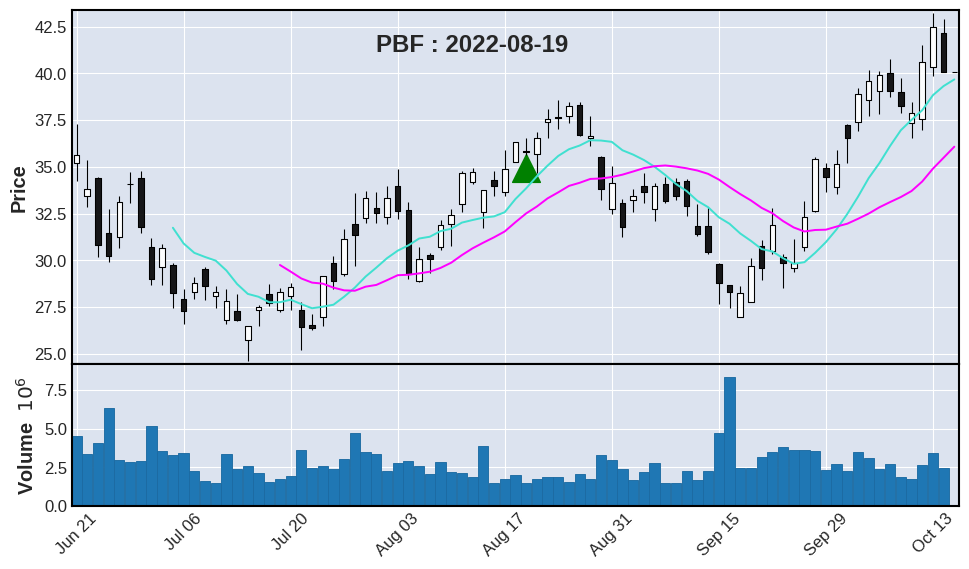

2022-06-20 -> 2023-01-16


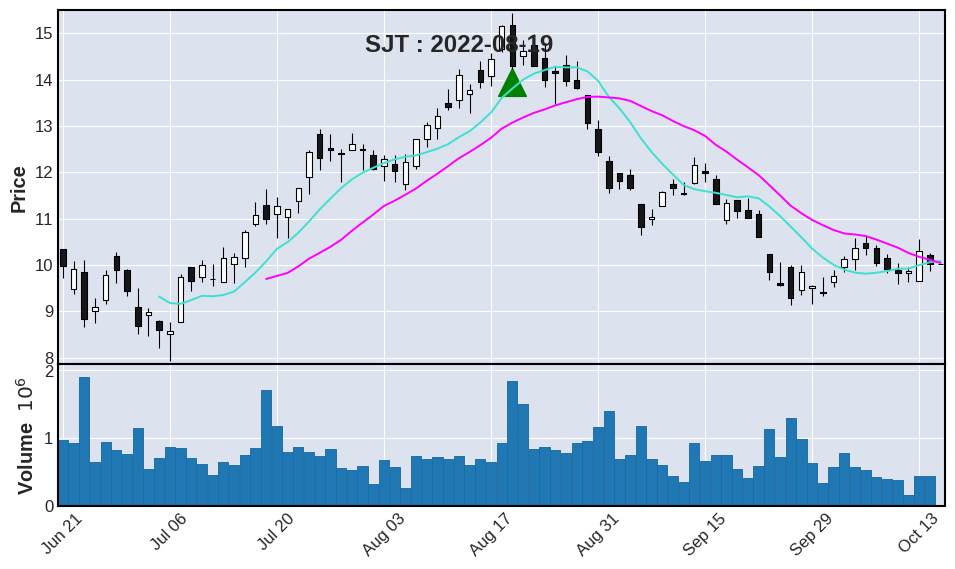

2022-06-19 -> 2023-01-15


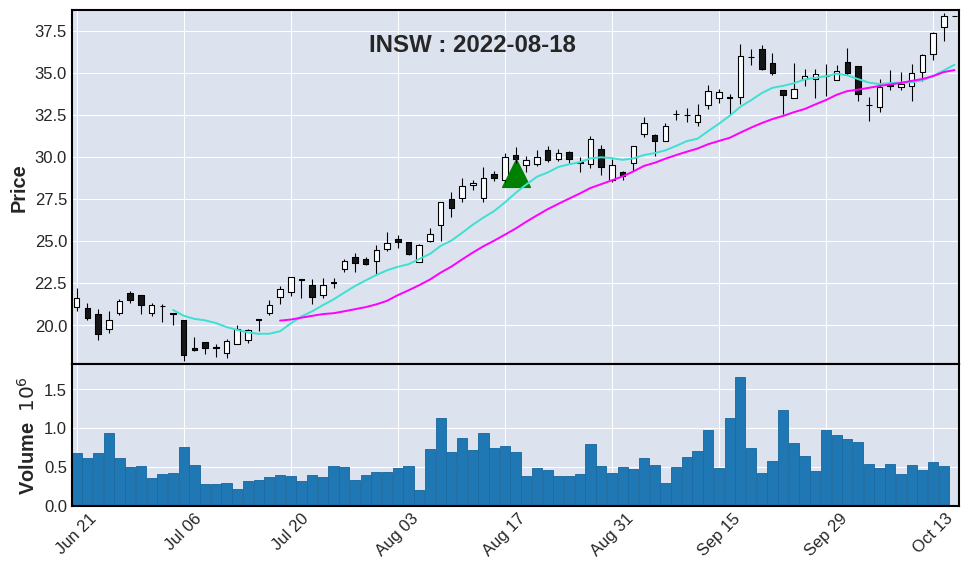

2022-06-19 -> 2023-01-15


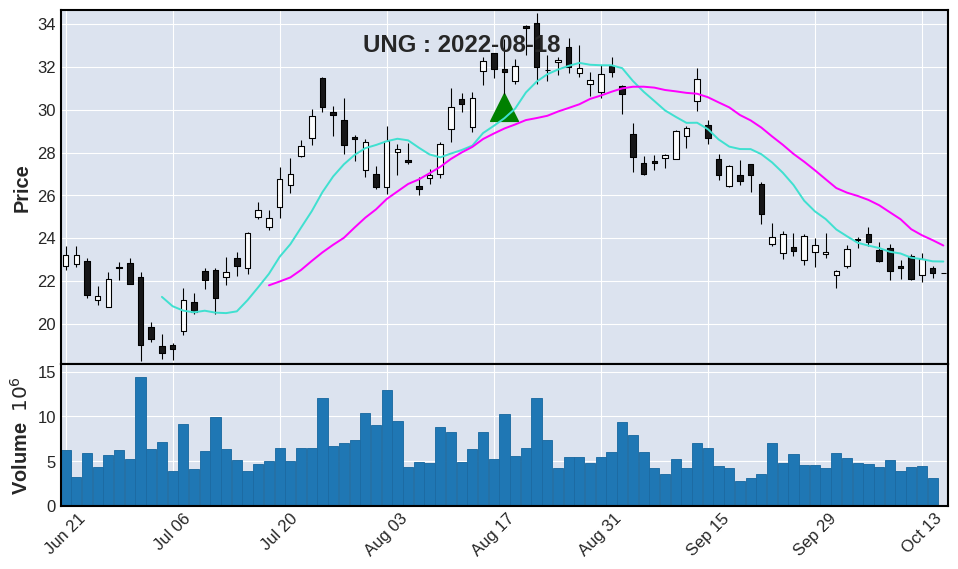

2022-06-18 -> 2023-01-14


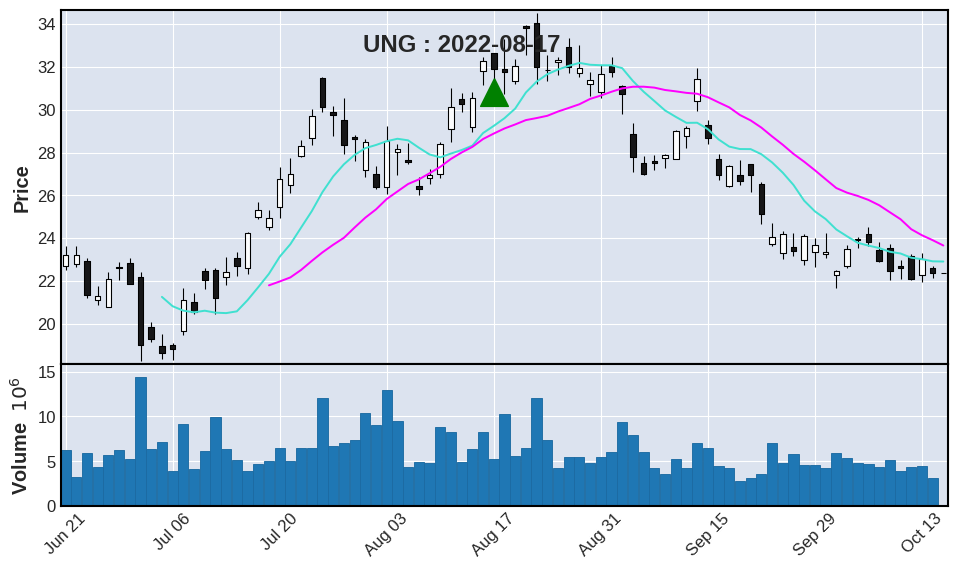

2022-06-17 -> 2023-01-13


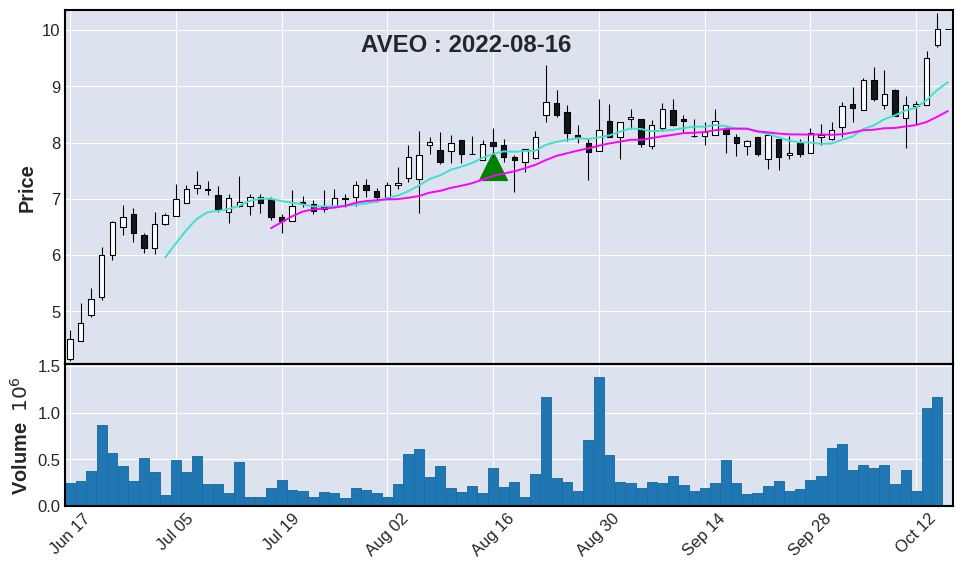

2022-06-17 -> 2023-01-13


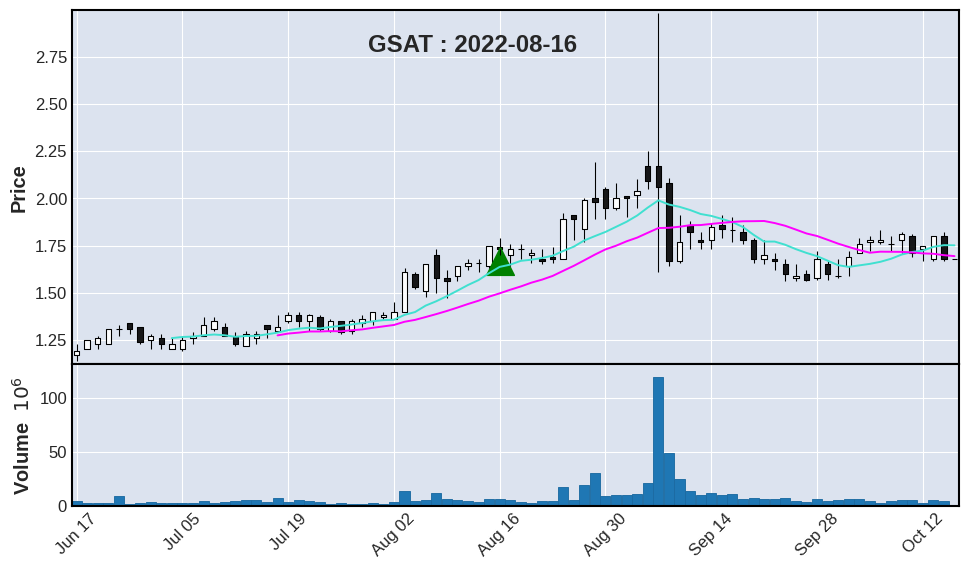

2022-06-16 -> 2023-01-12


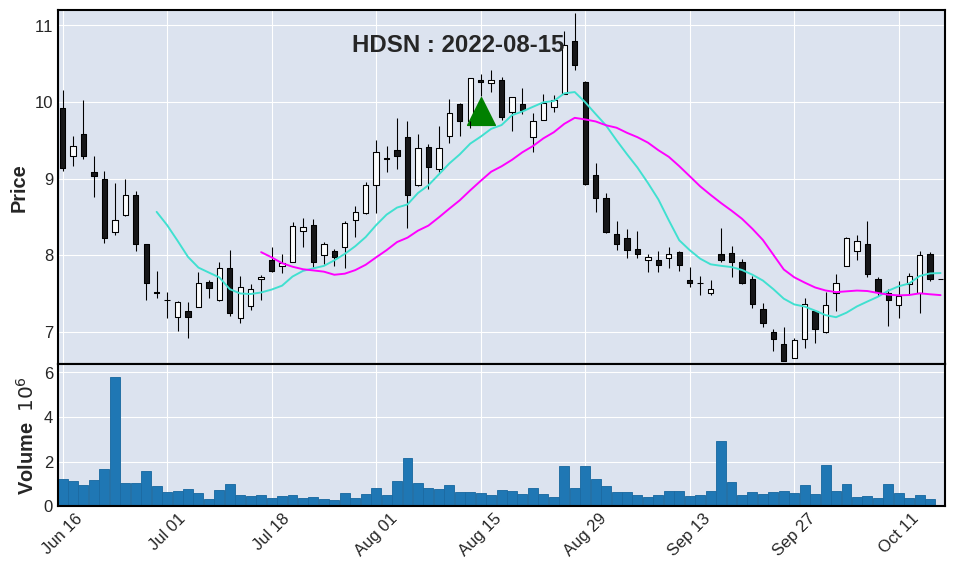

2022-06-16 -> 2023-01-12


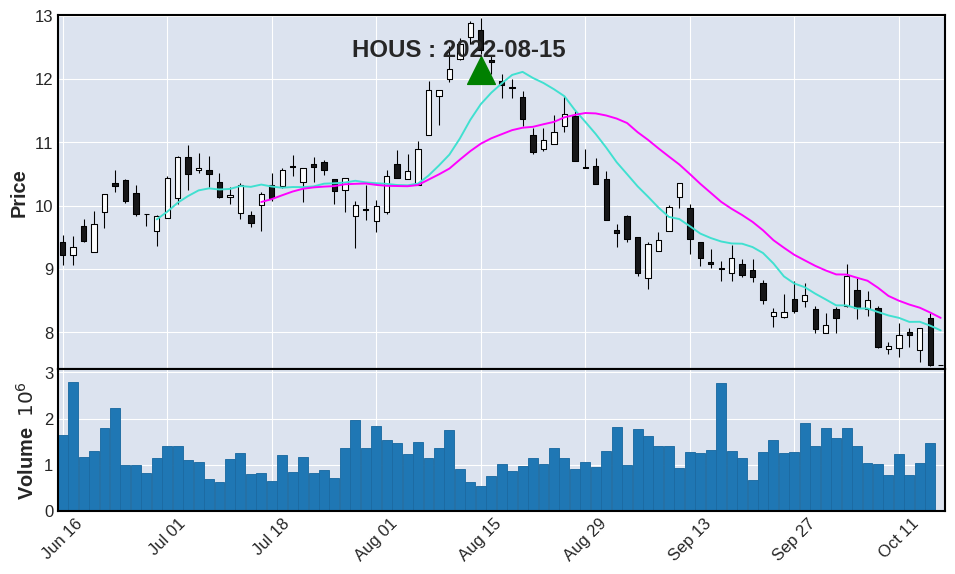

2022-06-13 -> 2023-01-09


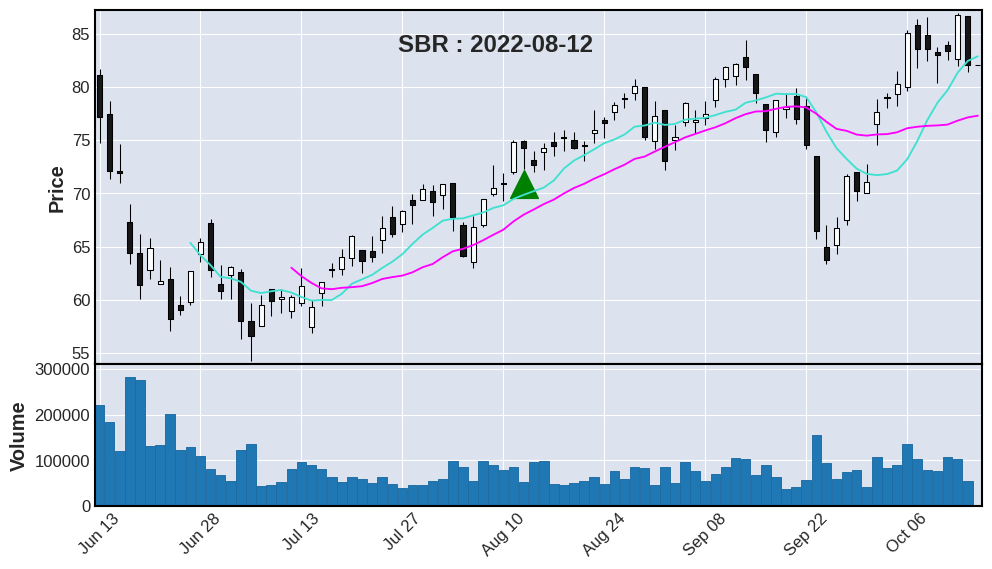

2022-06-12 -> 2023-01-08


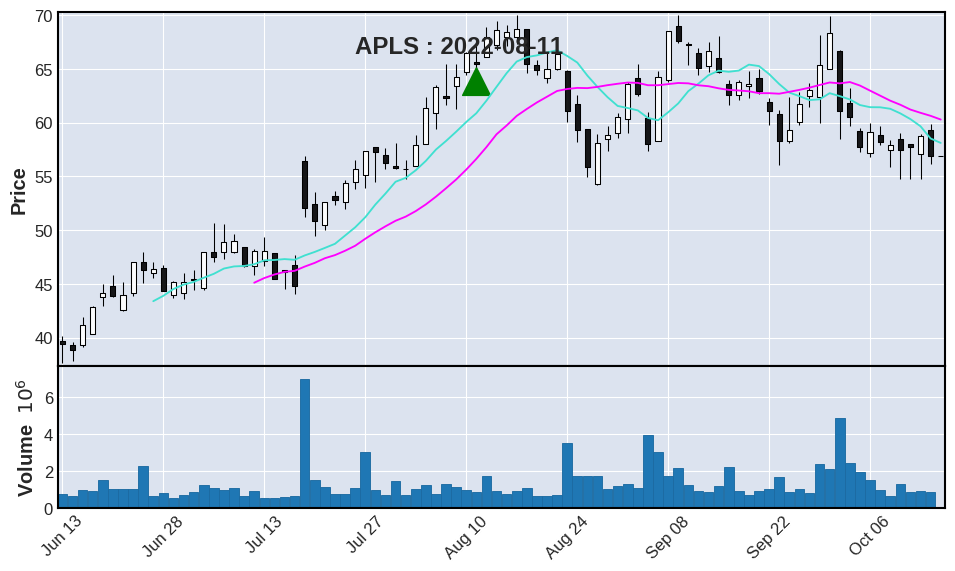

2022-06-12 -> 2023-01-08


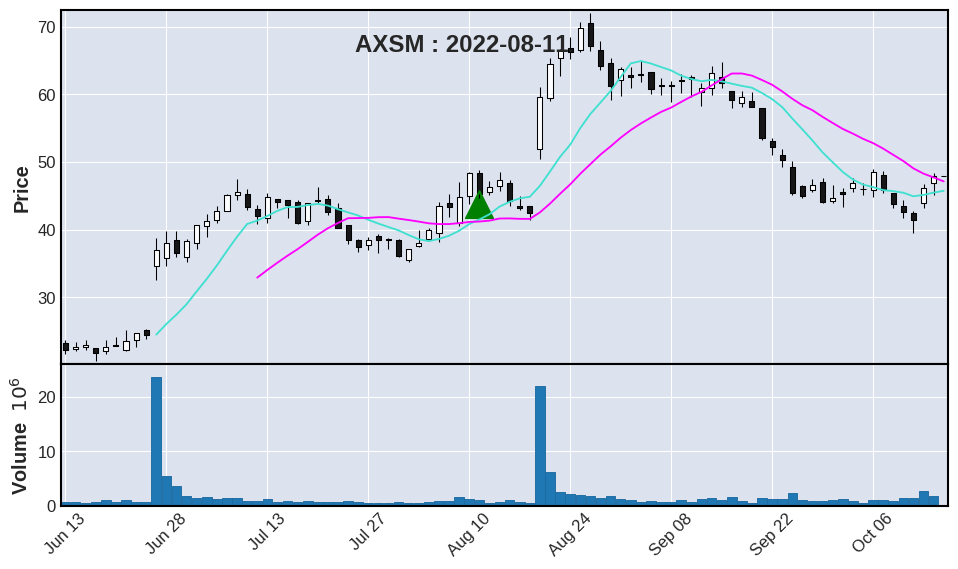

2022-06-12 -> 2023-01-08


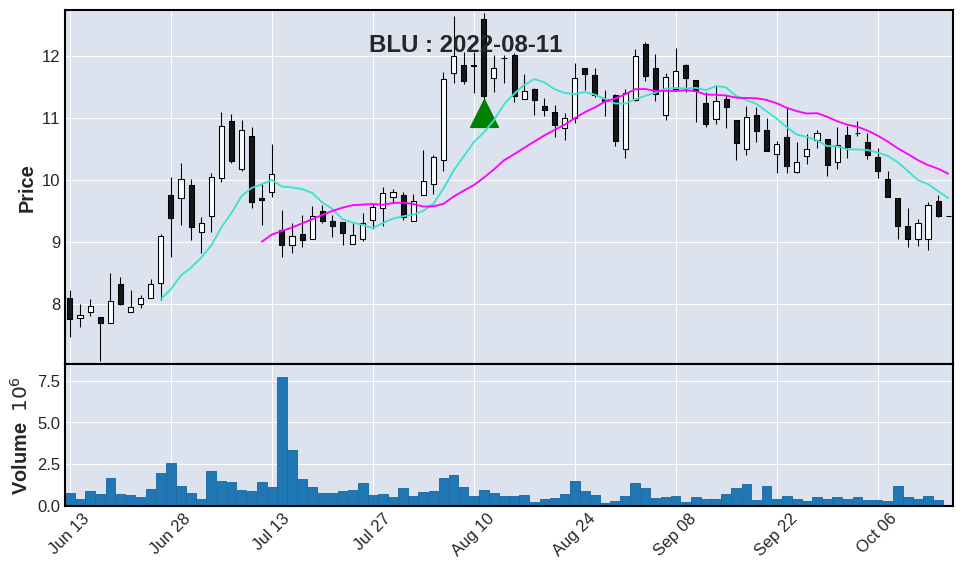

2022-06-12 -> 2023-01-08


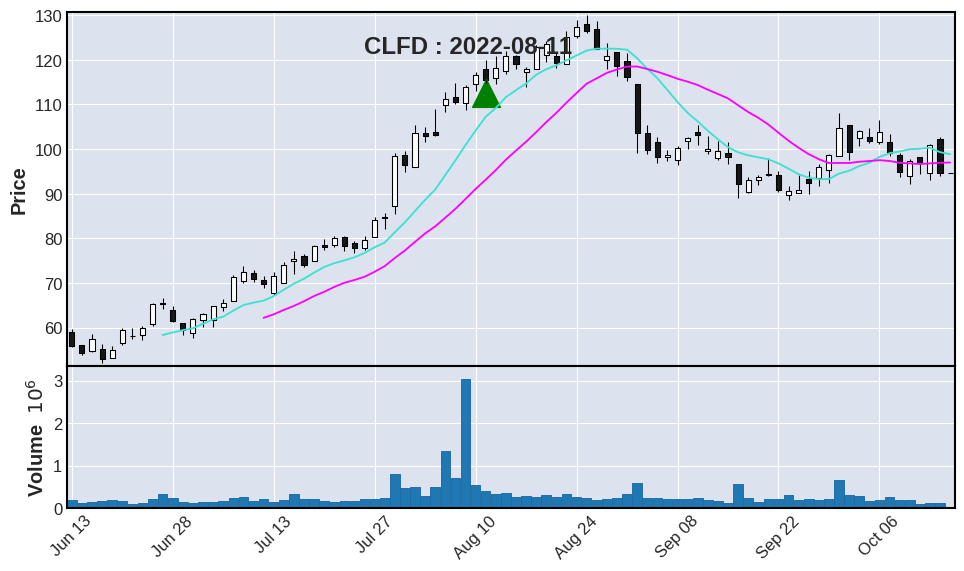

2022-06-12 -> 2023-01-08


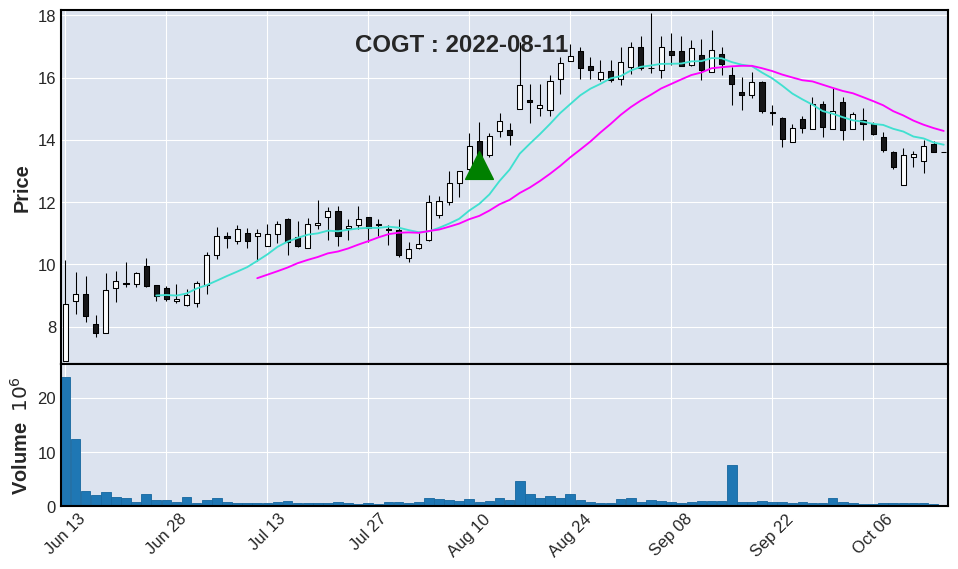

2022-06-12 -> 2023-01-08


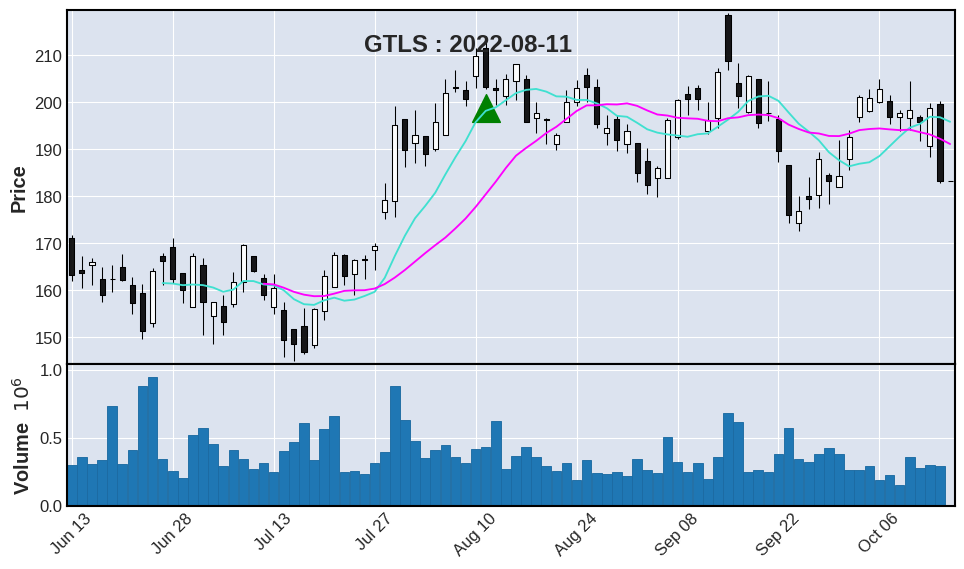

2022-06-12 -> 2023-01-08


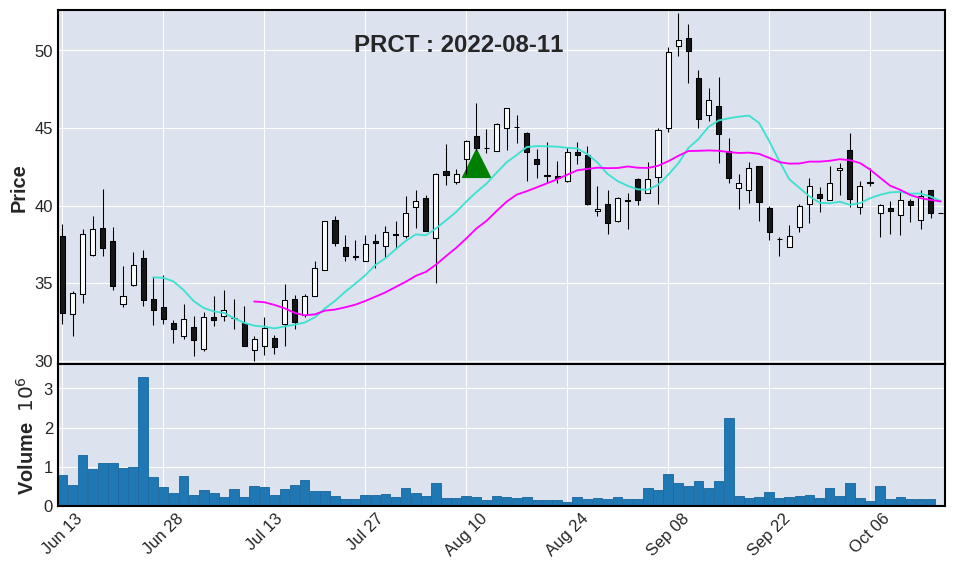

2022-06-12 -> 2023-01-08


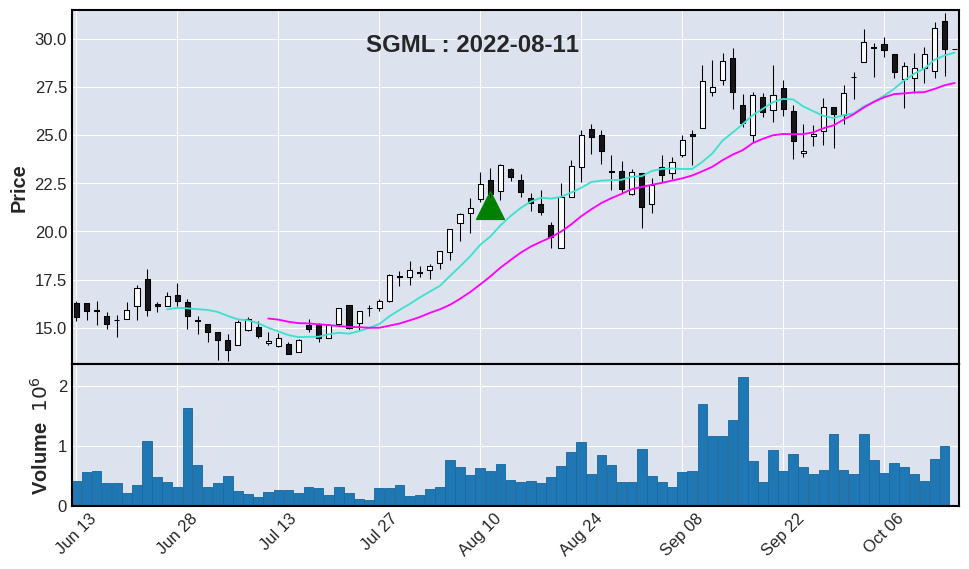

2022-06-12 -> 2023-01-08


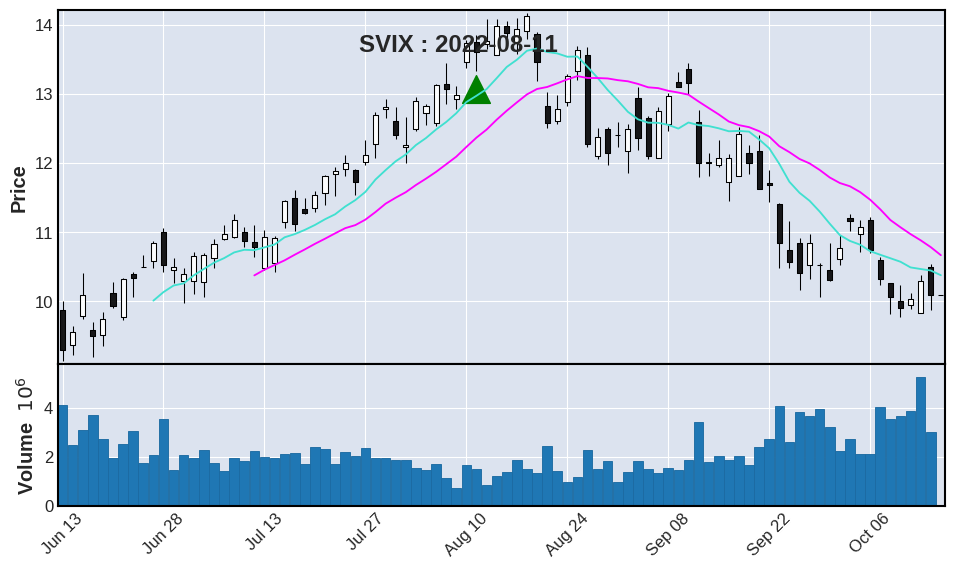

2022-06-12 -> 2023-01-08


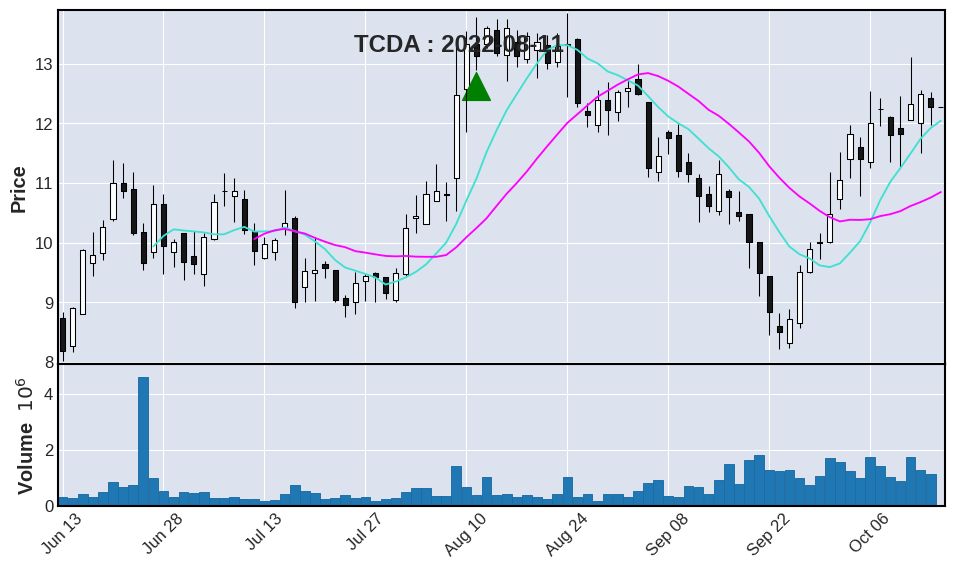

2022-06-12 -> 2023-01-08


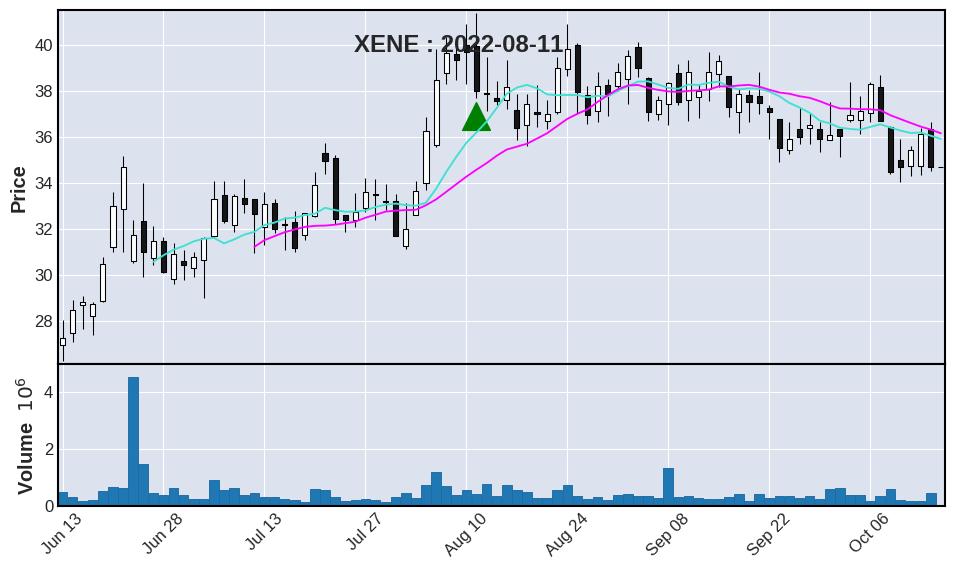

2022-06-11 -> 2023-01-07


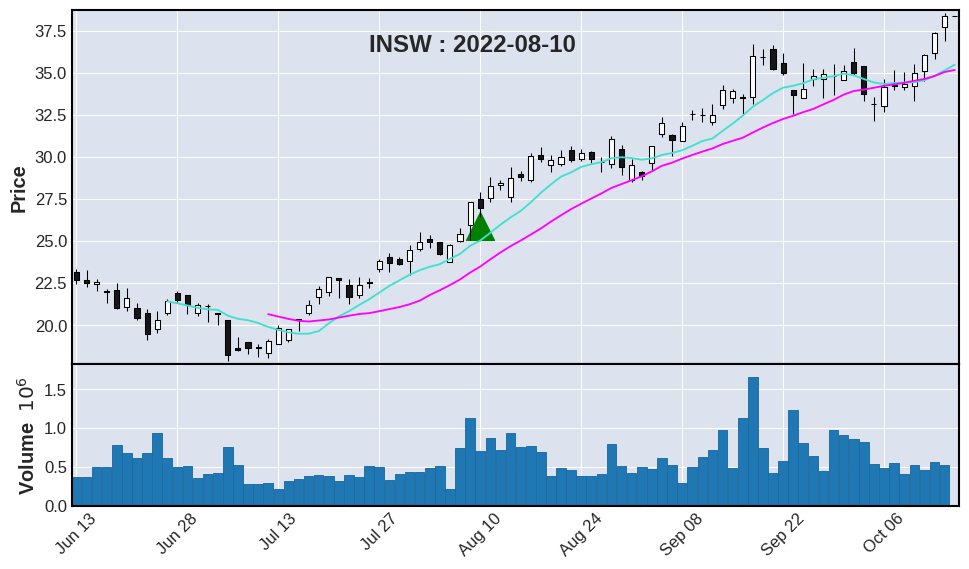

2022-06-11 -> 2023-01-07


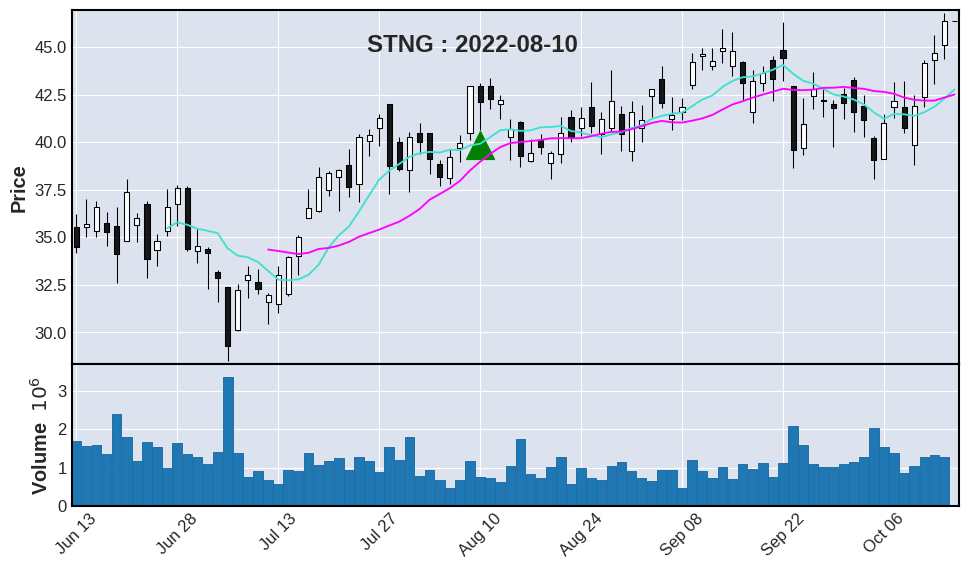

2022-06-11 -> 2023-01-07


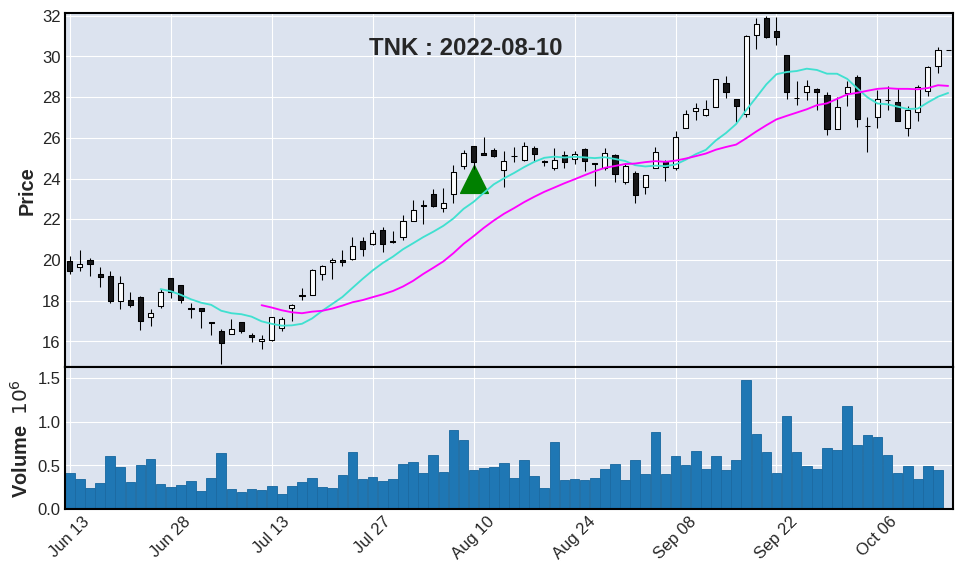

2022-06-10 -> 2023-01-06


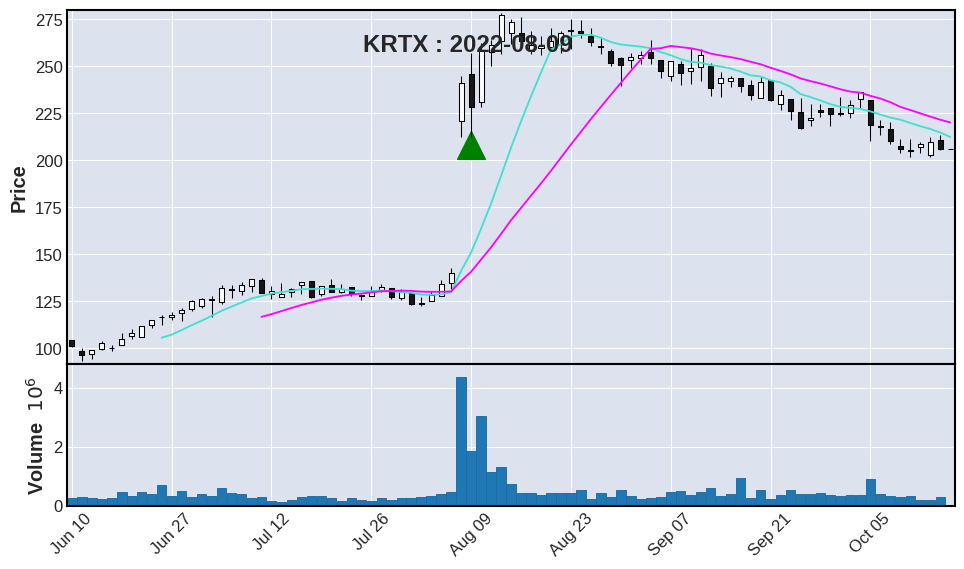

2022-06-10 -> 2023-01-06


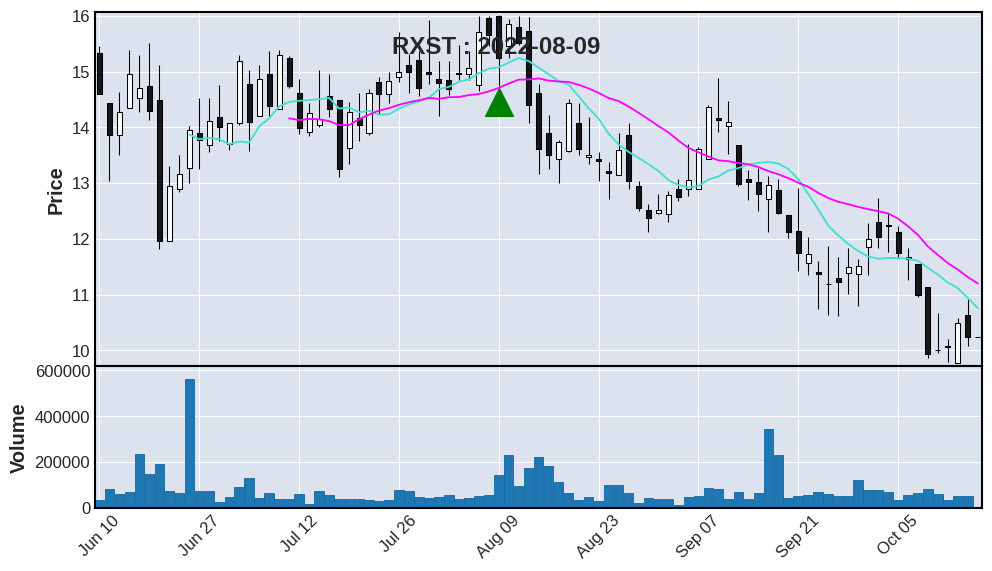

2022-06-09 -> 2023-01-05


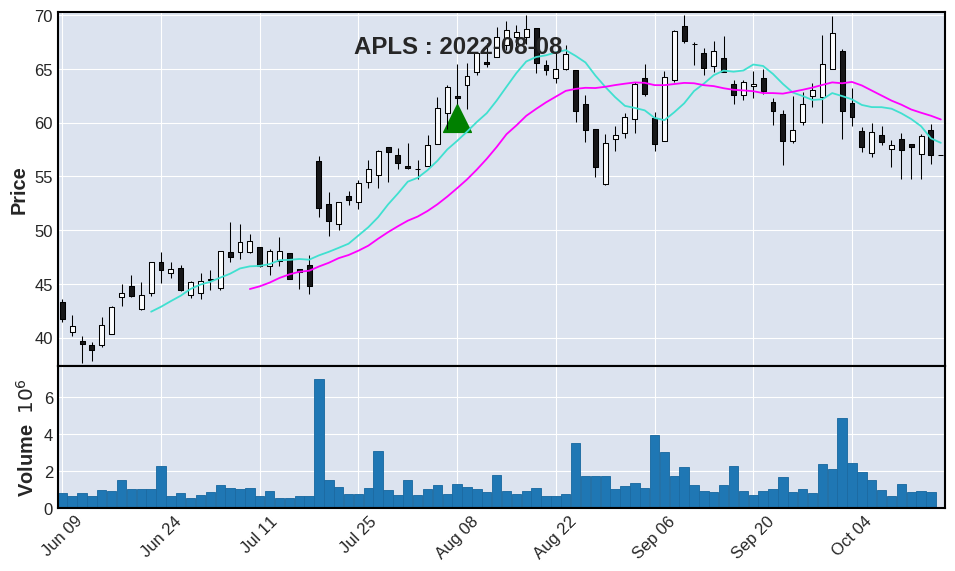

2022-06-09 -> 2023-01-05


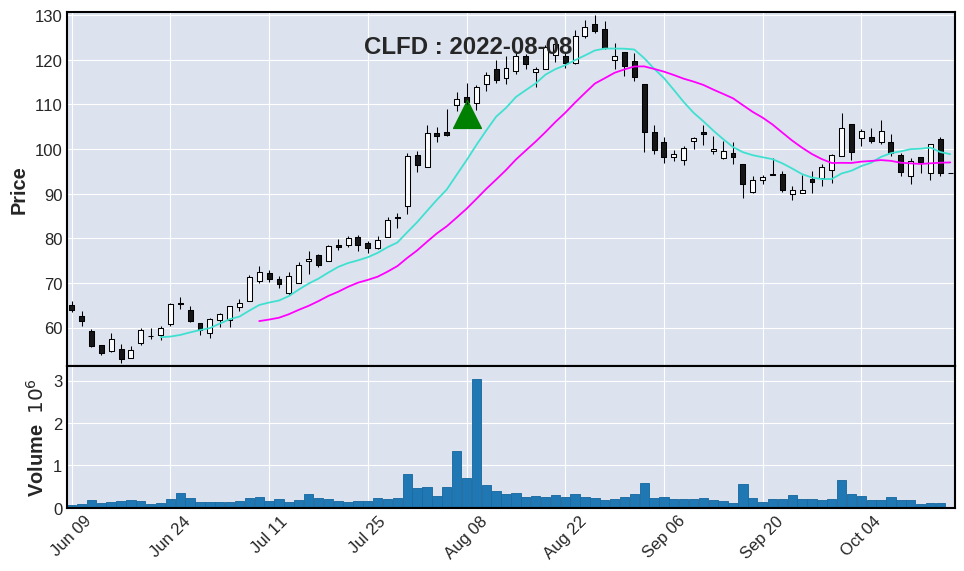

2022-06-09 -> 2023-01-05


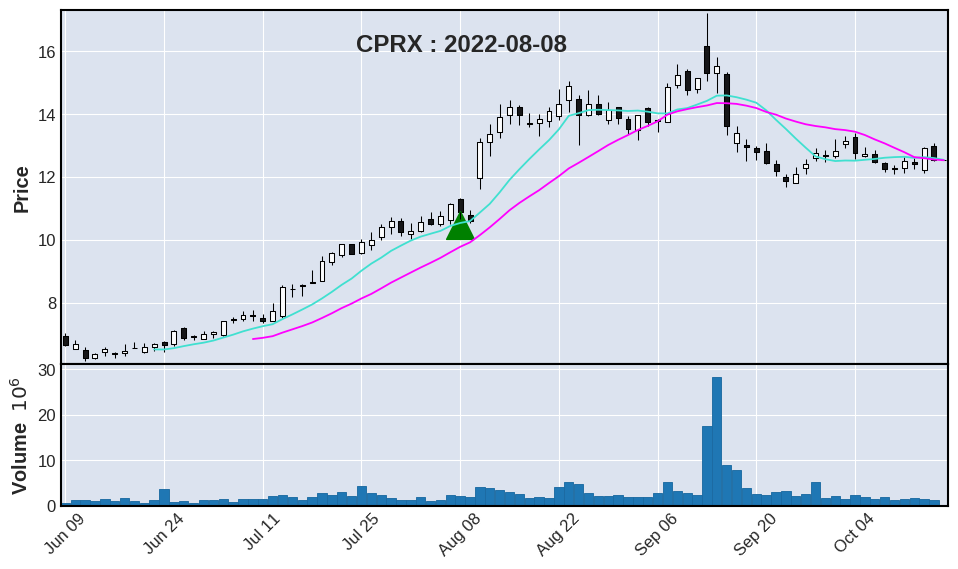

2022-06-09 -> 2023-01-05


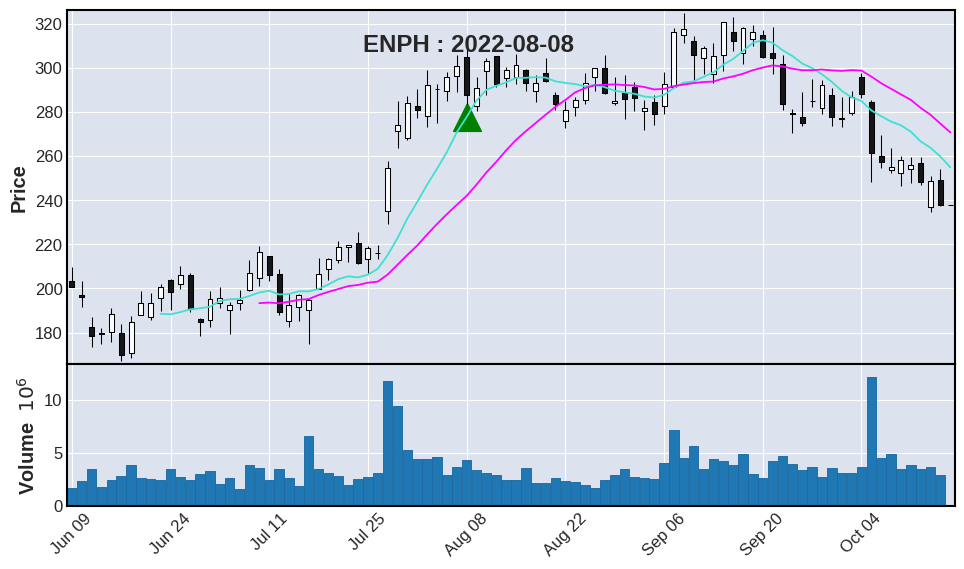

2022-06-09 -> 2023-01-05


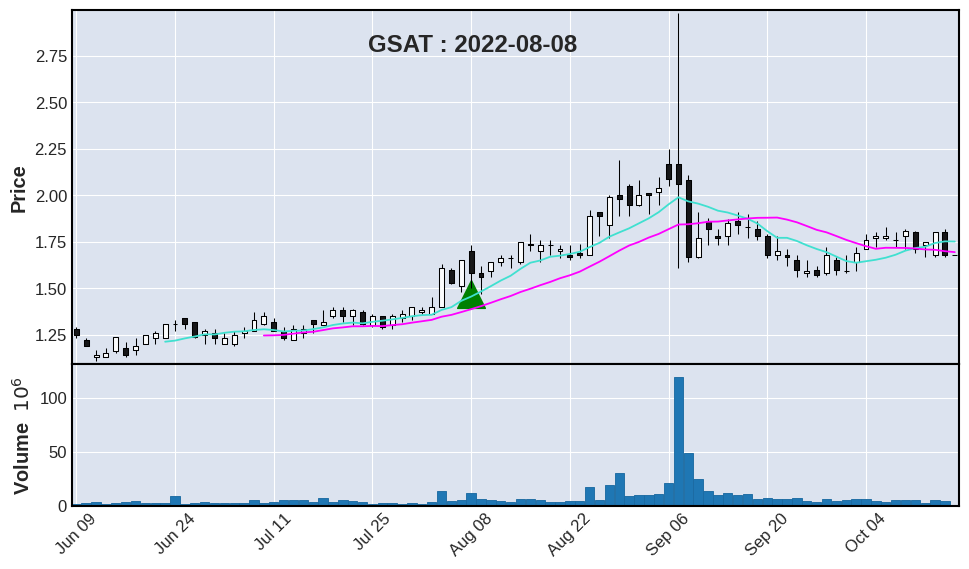

2022-06-09 -> 2023-01-05


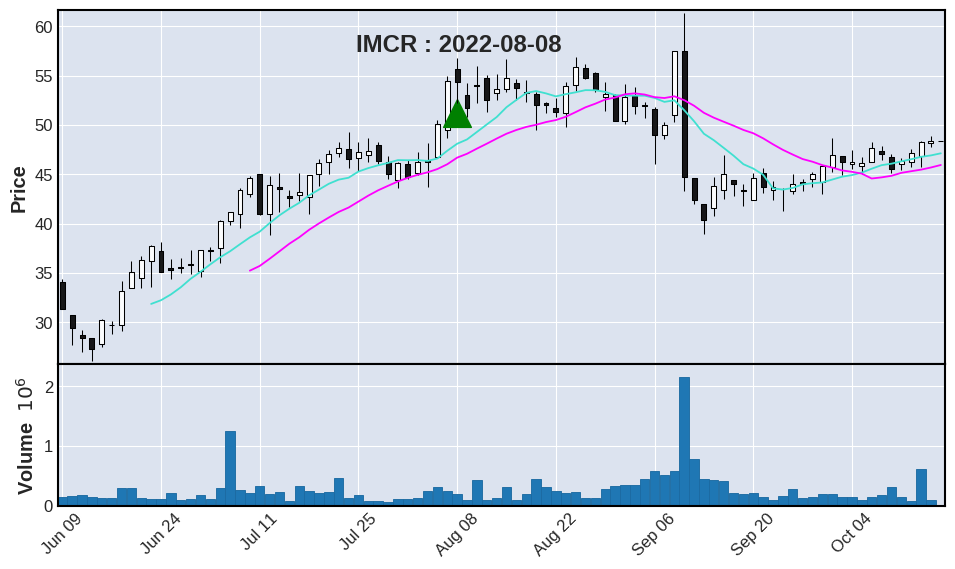

2022-06-09 -> 2023-01-05


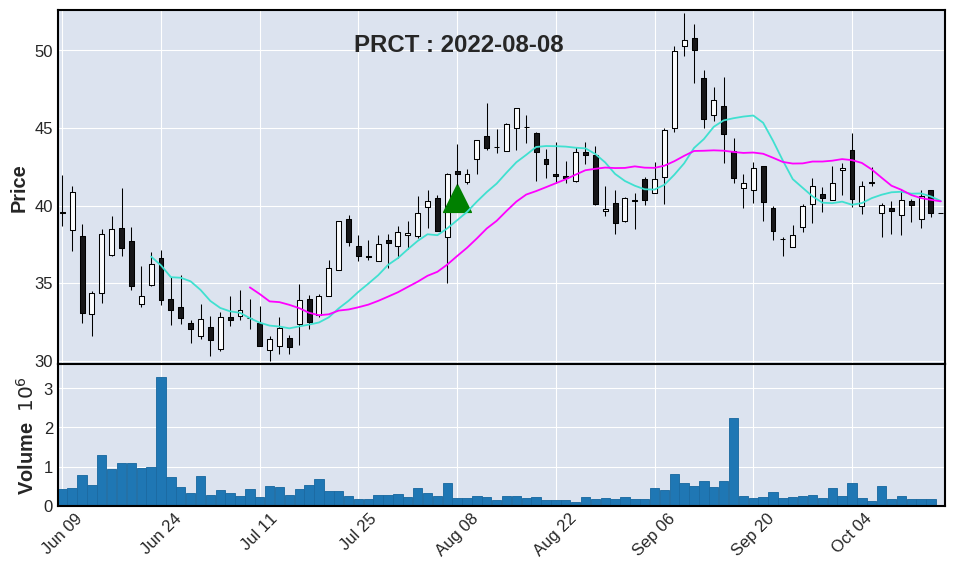

2022-06-09 -> 2023-01-05


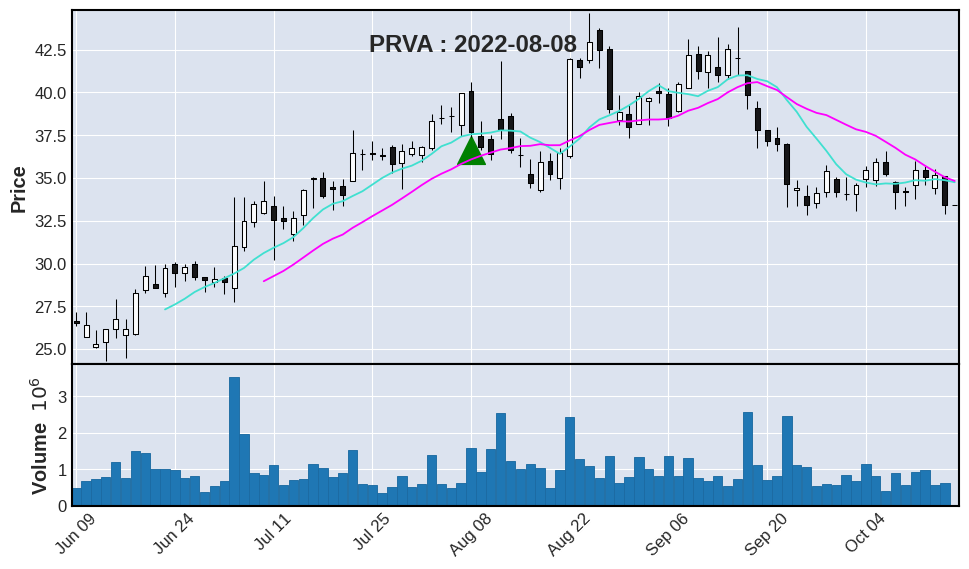

2022-06-09 -> 2023-01-05


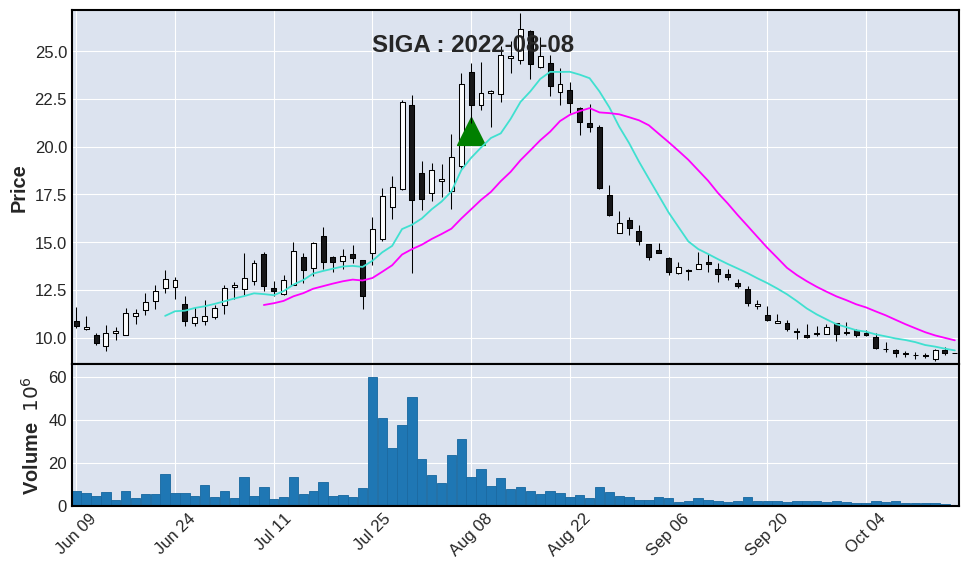

2022-06-09 -> 2023-01-05


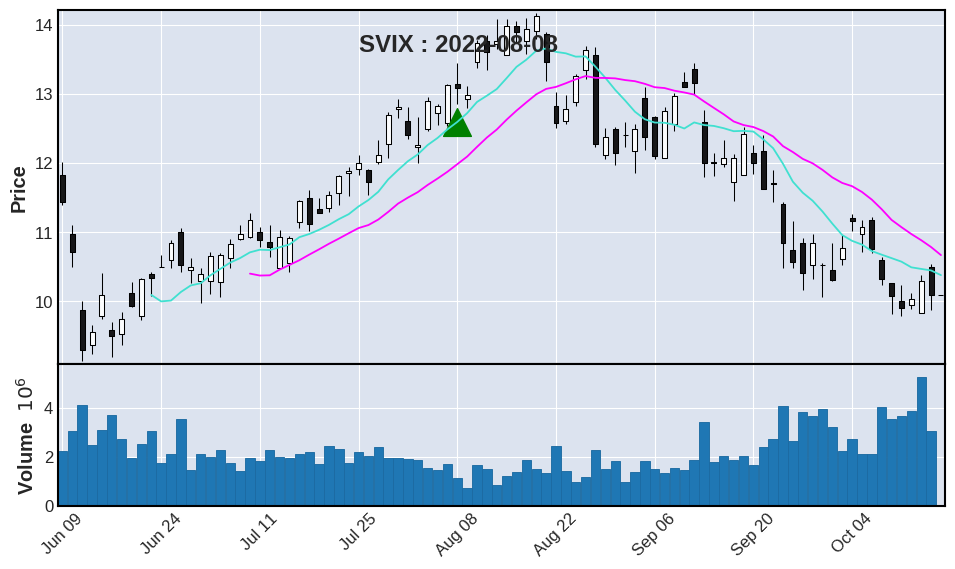

2022-06-09 -> 2023-01-05


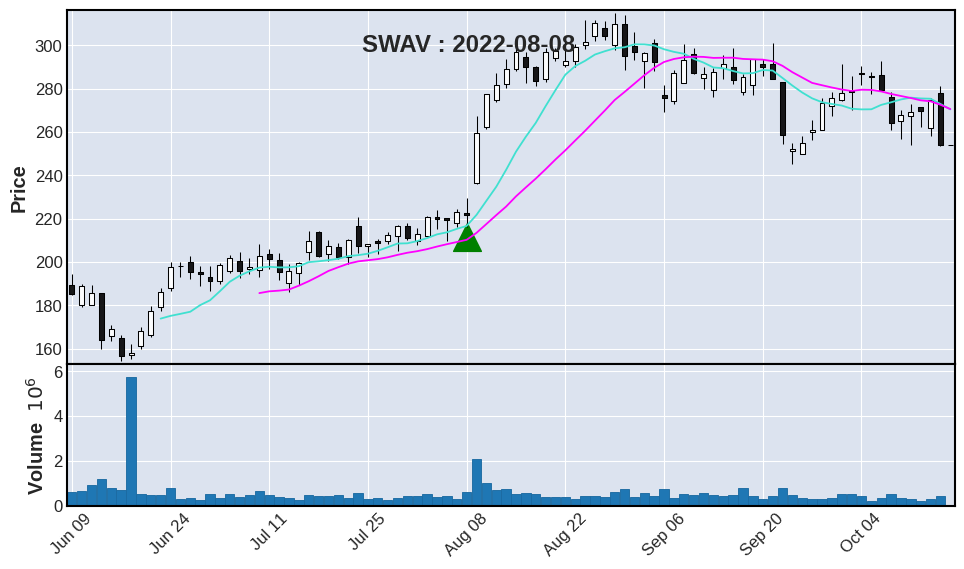

2022-06-09 -> 2023-01-05


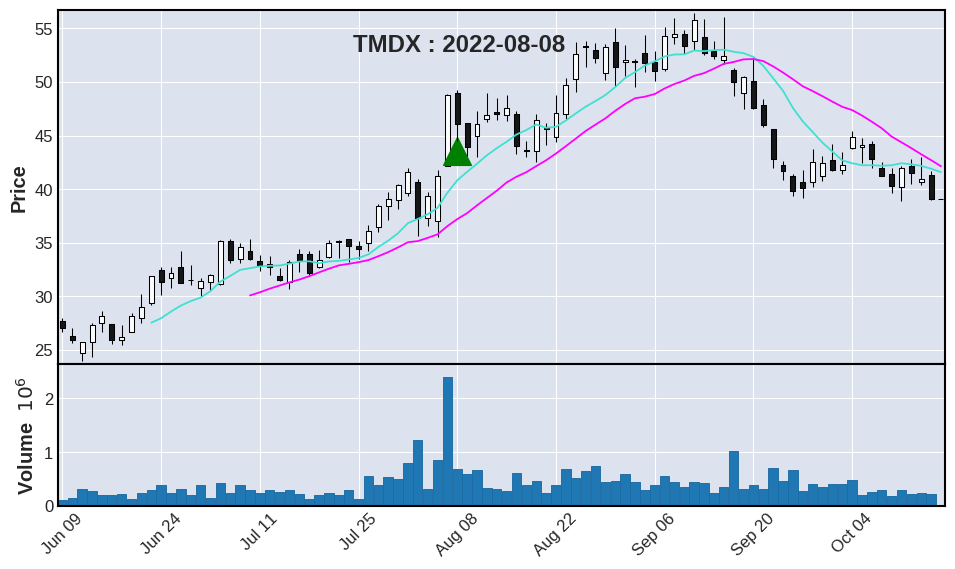

2022-06-06 -> 2023-01-02


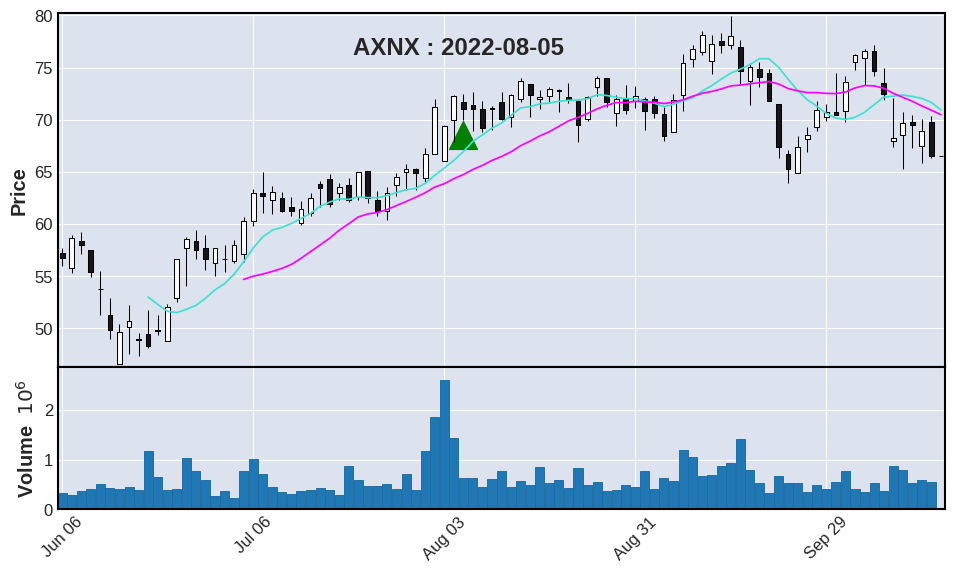

2022-06-06 -> 2023-01-02


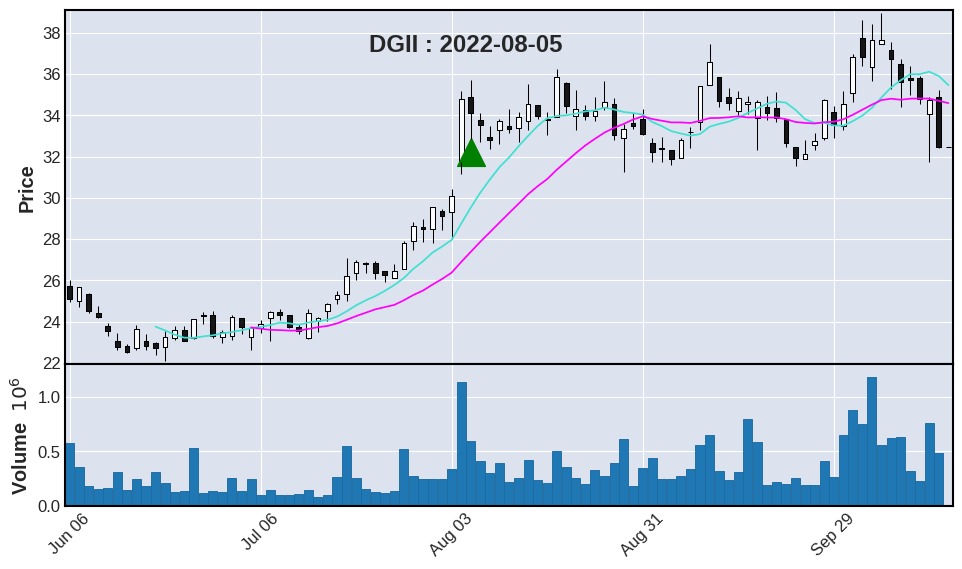

2022-06-05 -> 2023-01-01


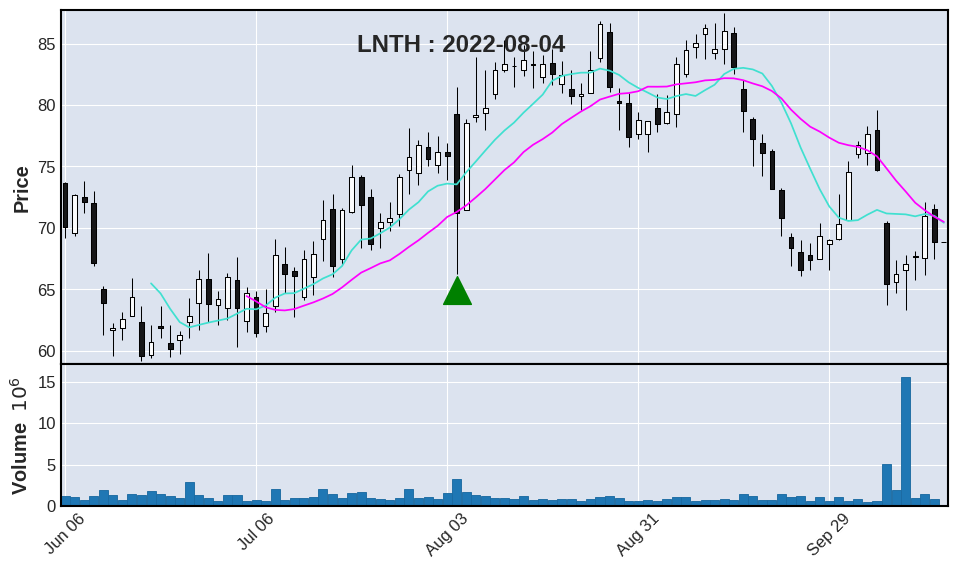

2022-06-05 -> 2023-01-01


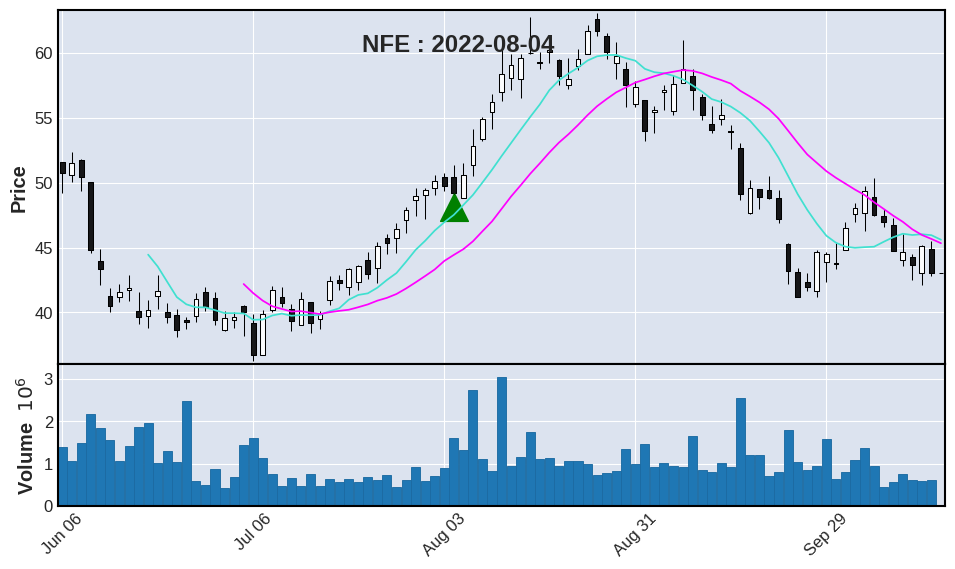

2022-06-05 -> 2023-01-01


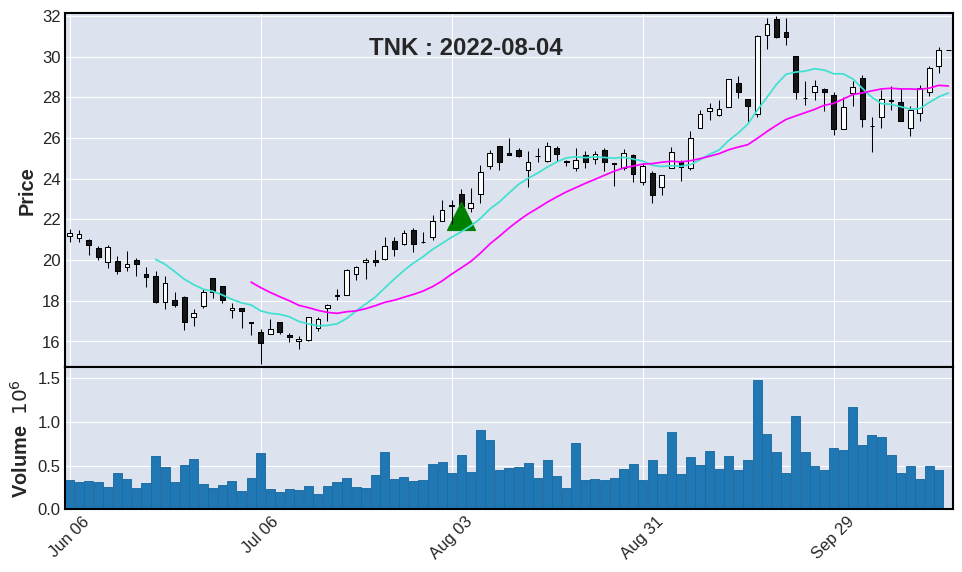

2022-06-04 -> 2022-12-31


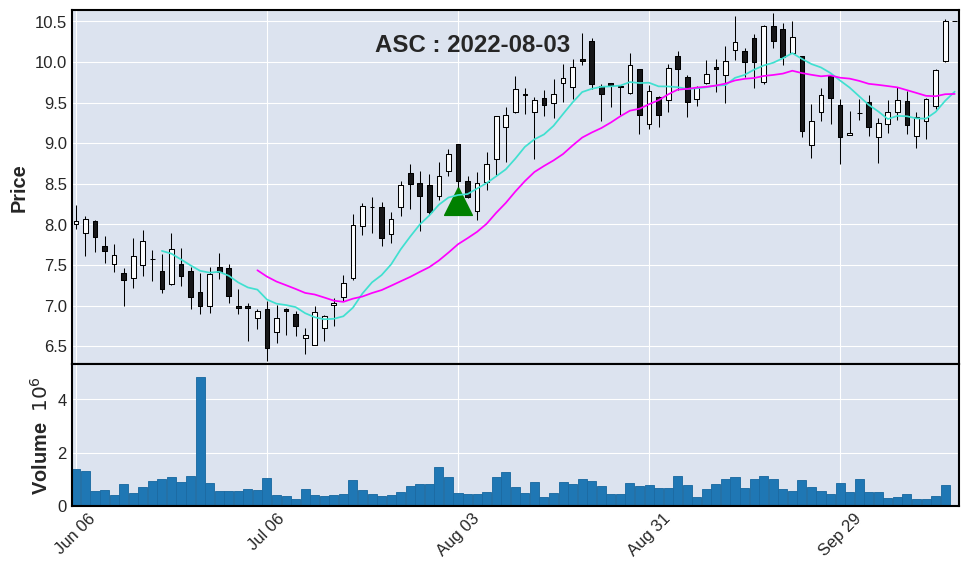

2022-06-04 -> 2022-12-31


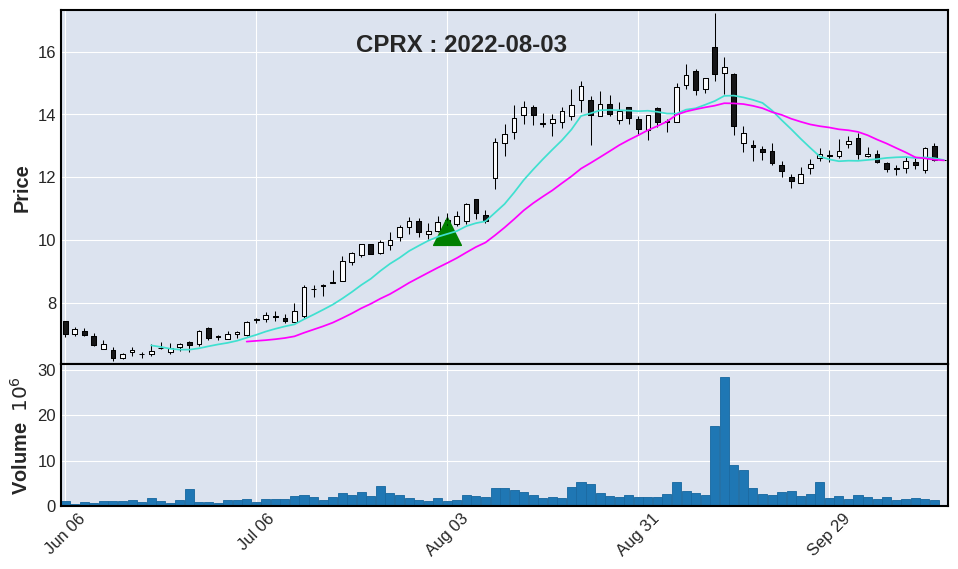

2022-06-04 -> 2022-12-31


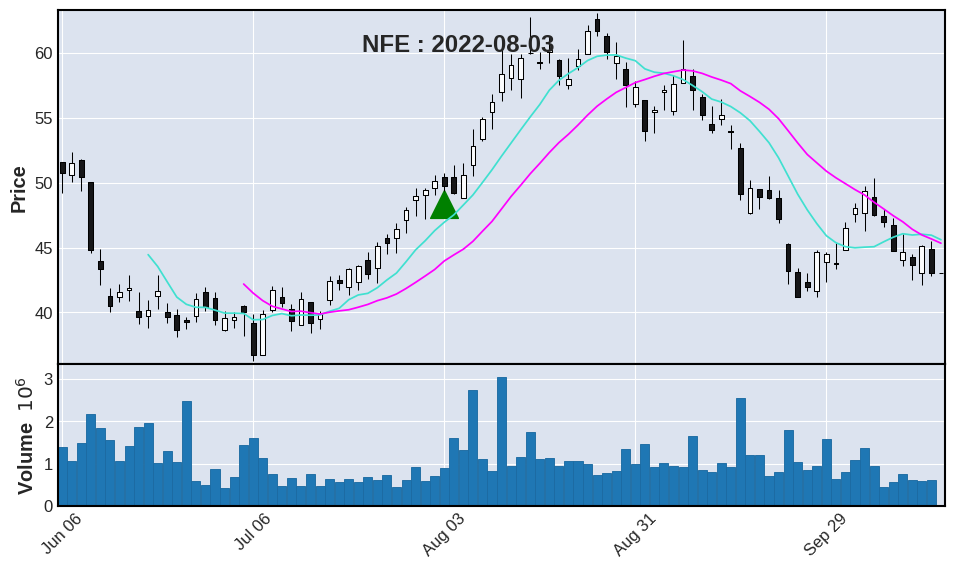

2022-06-04 -> 2022-12-31


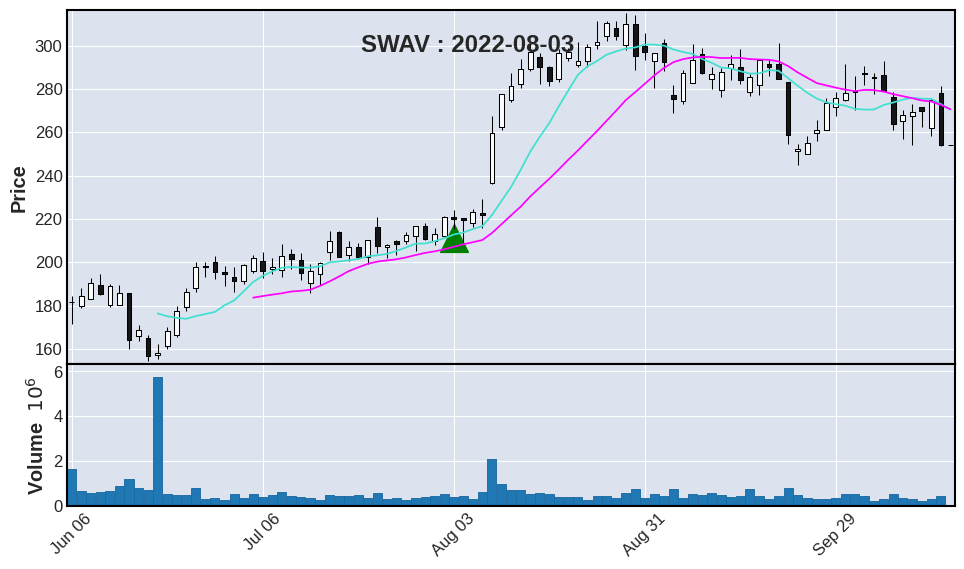

2022-06-02 -> 2022-12-29


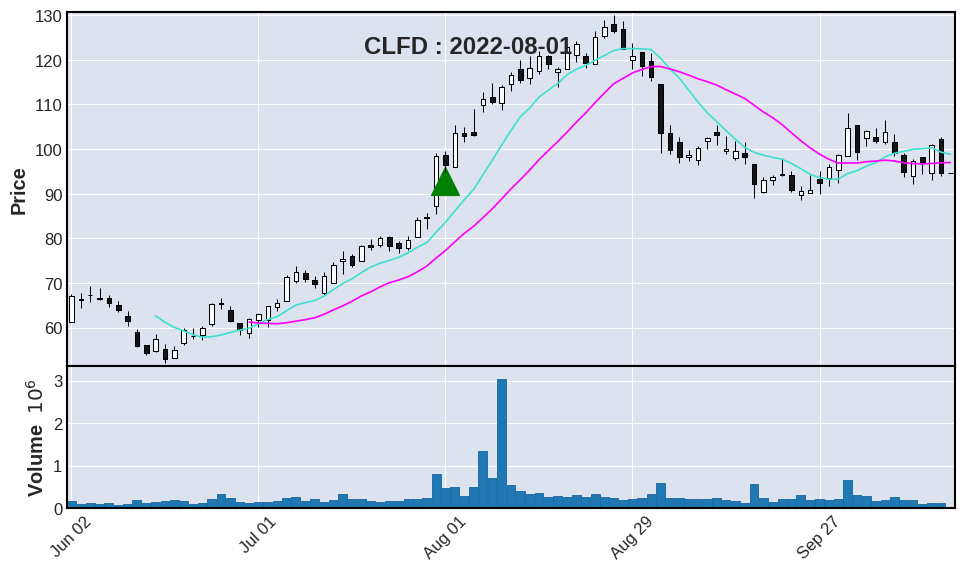

In [78]:
for index, row in df.iterrows():
    
    start=row['patternTimeFrom'].strftime('%Y-%m-%d')
    end=row['patternTimeTo'].strftime('%Y-%m-%d')

    print(start + ' -> ' + end)

# urllib.parse.quote(query)
    url = baseurl + '/chart/' + row['symbol'] + '/d?from=' + encodeUrl(start) + '&to=' + encodeUrl(end)
    # print(url)
    chartResponse = requests.get(url)
    # print(chartResponse)
    # chartDf = pd.json_normalize(json.loads(chartResponse.text))
    chartDf = None
    try:
      chartDf = pd.DataFrame(chartResponse.json()['payload'])
    except Exception as e:
      print(e.__class__)
      print(e)
      print(chartResponse)
      print(chartResponse.text)
      break
    
    chartDf.tickTime = pd.to_datetime(chartDf.tickTime)
    chartDf = chartDf.set_index('tickTime')
    chartDf.drop(['id', 'symbol','created'], axis=1, inplace=True)

    entry = row['patternTime'].strftime('%Y-%m-%d')

    buy = np.where(chartDf.index==entry, 1, np.nan) * 0.98 * chartDf['low']
    apd = [mpf.make_addplot(buy, scatter=True,  type='scatter', markersize=400, marker='^', color='green')]

    mpf.plot(chartDf[start:end], type='candle', 
         volume=True, mav=(10,20),title = row['symbol'] + ' : ' + row['patternTime'].strftime('%Y-%m-%d'),
        tight_layout=True, figratio=(16,9), addplot=apd)
    
    # plotPerformance(ticker)
